# California Housing

This dataset contains data from a 1990 census date in a California disctrict. First let's import the dataset and take a better look at its attributes

In [1]:
#Importing main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Importing dataset
dataset = pd.read_csv('california_housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As we can see, the dataset have only one categorical feature (ocean_proximity), so let's take a better look at it:

In [3]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As most Machine Learning algorithms don't work well with text labels, we should convert these to numbers

In [4]:
#Importing OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(sparse=False)
dataset_categorical_ohe = categorical_encoder.fit_transform(dataset[['ocean_proximity']])
dataset_categorical_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [5]:
categorical_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

converting the numpy array to a dataframe:

In [6]:
dataset_categorical_ohe = pd.DataFrame(data=dataset_categorical_ohe, index= None , columns=categorical_encoder.categories_)
dataset_categorical_ohe.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


We should also drop one of these columns now to avoid the dummy variable trap, so let's drop the 'ISLAND' column:

In [7]:
dataset_categorical_ohe.drop(['ISLAND'],axis=1, inplace = True)

In [8]:
dataset_categorical_ohe.head()

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


Now we can append this back to the original dataset and move on:

In [9]:
#Removing the categorical column
dataset = dataset.iloc[:,:-1]

#adding the one-hot-encoded columns
dataset = pd.concat([dataset, dataset_categorical_ohe], axis=1);
#renaming ocean proximity labels
dataset.columns = [str(s) for s in dataset.columns]
dataset.rename(index=str, columns = {"('<1H OCEAN',)": '<1H OCEAN', "('INLAND',)": "INLAND","('NEAR BAY',)": "NEAR BAY","('NEAR OCEAN',)": "NEAR OCEAN"}, inplace = True)

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


Another useful analysis is to verify if there is any column with data missing:

In [10]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

A good way to take care of those missing values is by replacing them with them median from that feature:

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)

#Transform the dataset:
dataset_without_missing_values = imputer.transform(dataset)

dataset = pd.DataFrame(dataset_without_missing_values, columns=dataset.columns, index = list(dataset.index.values))
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [12]:
#verifying if it worked
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [13]:
#main statistics from attributes
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing
Let's make some plots to help understand our data better

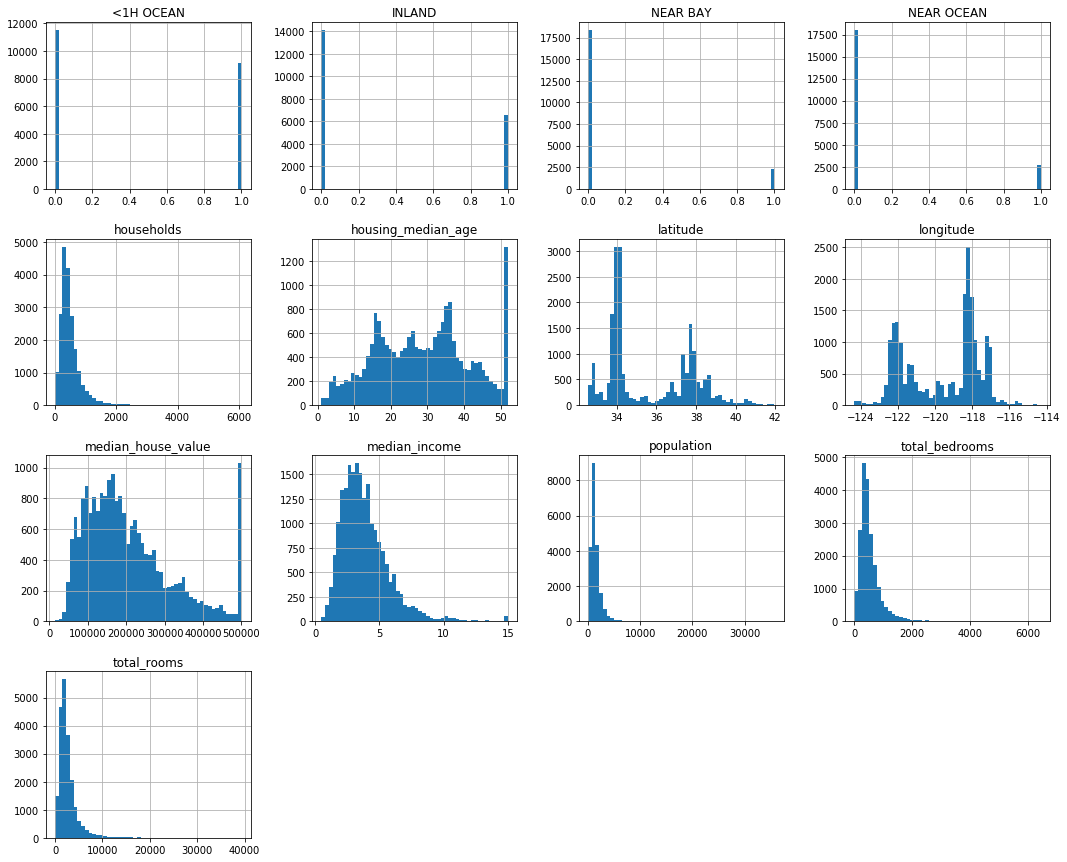

In [14]:
dataset.hist(bins=50, figsize=(18,15))
plt.show();

C:\Users\PC\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


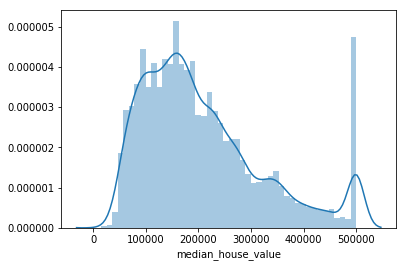

In [15]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.distplot(dataset['median_house_value'])
plt.show()

There is a strange pattern in the price frequency around 500000, which could be wrong data, so we can smooth it:

In [16]:
dataset[dataset['median_house_value']>490000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
495500.0      3
492500.0      2
491200.0      2
Name: median_house_value, dtype: int64

So we're going to remove values above 500000

In [17]:
dataset=dataset.loc[dataset['median_house_value']<=500000,:]

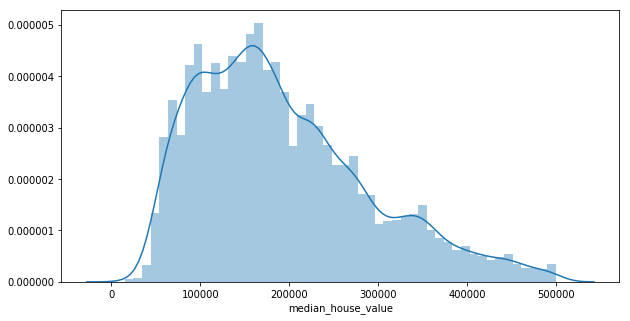

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['median_house_value'])
plt.show()

#### Plotting the Longitude and Latitude of each instance, with population density and price of the house

Each circle radius represents the district’s population (option s), and the color of each circle represents the price (option c). The color map 'jet' makes the lowest values appear as blue and the highest values red. We can see that there is a tendency of the prices to be higher near the ocean

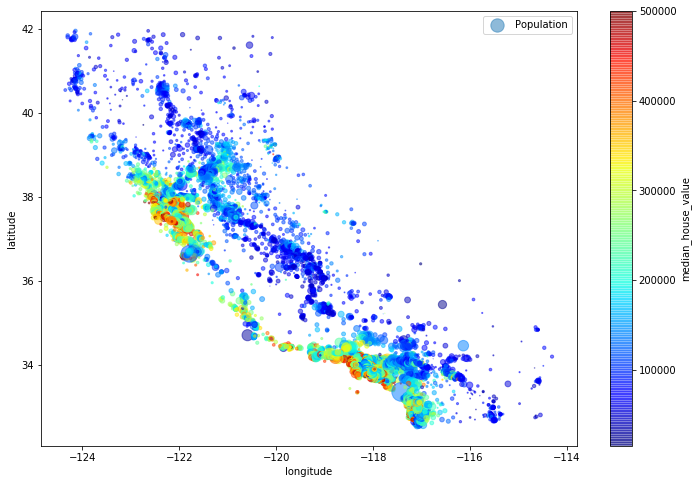

In [20]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=dataset["population"]/100, label="Population",
             figsize=(12,8), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend();

#### Looking for Correlations
We are going to predict the values of the houses in this model, so we can start by looking how the other attributes correlates with our label

In [21]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642611
<1H OCEAN             0.284524
NEAR BAY              0.157077
total_rooms           0.143139
NEAR OCEAN            0.135889
households            0.094894
total_bedrooms        0.074178
housing_median_age    0.067948
population            0.011964
longitude            -0.046658
latitude             -0.148289
INLAND               -0.499008
Name: median_house_value, dtype: float64

The most promising attributes to be correlated with "median_house_value" are: "median_income", "total_rooms", "households", so we can plot a scatter matrix to take a better look:

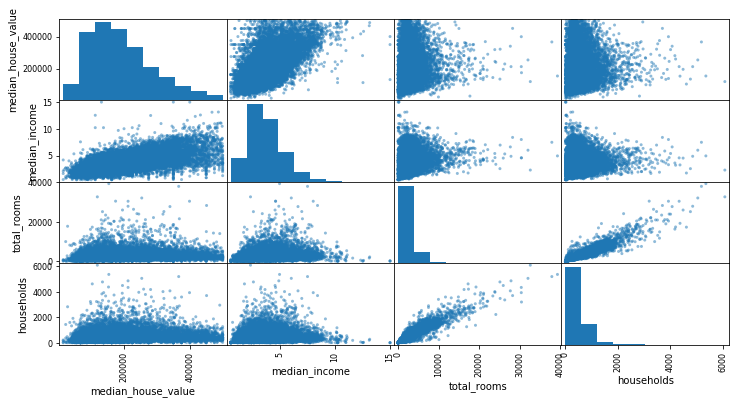

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset[["median_house_value", "median_income", "total_rooms", "households"]], figsize=(12, 6));

### Combining attributes
We can transform some attributes so they can become more relevant to our analysis:

* the total number of rooms in a district is not very useful if you don’t know how many households there are, so it's more       interesting to have the **number of rooms per household**.

* The same goes for the total number of bedrooms, that by itself is not very useful, so we can compare it to the number of  rooms.

* Another one we can create is the **population per household**

In [23]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"]=dataset["population"]/dataset["households"]
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0,6.281853,0.172096,2.181467


Let's see the correlation one more time:

In [24]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.642611
<1H OCEAN                   0.284524
NEAR BAY                    0.157077
total_rooms                 0.143139
NEAR OCEAN                  0.135889
rooms_per_household         0.109673
households                  0.094894
total_bedrooms              0.074178
housing_median_age          0.067948
population                  0.011964
population_per_household   -0.021465
longitude                  -0.046658
latitude                   -0.148289
bedrooms_per_room          -0.196226
INLAND                     -0.499008
Name: median_house_value, dtype: float64

With that we can see that our news attributes combinations have a higher correlation than their precessors

## Splitting the dataset into training and test set

In [25]:
#first we separate our labels from our attributes
X = dataset.drop('median_house_value', axis=1).values
y = dataset['median_house_value'].values

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

Let's try the following algorithms: 
* Linear Regression
* Polynomial Regression
* Decision Tree
* Random Forest

At each algorithm, the evaluation a metric is the $R^{2}$ score, which is metric that provides an indication of the goodness of a model prediction (coefficient of determination).
This score ranges between 0 for no-fit and 1 for a perfect fit.
A Comparison table is showed at the end. The other metrics such as **Mean Absolute Error** and **Mean Squared Error** can be easilly applied too.

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [56]:
#Fitting linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the test set results
y_pred = regressor.predict(X_test)

In [61]:
#Performing Cross Validation Scoring
cross_val_lr = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = regressor, scoring = 'r2')
r2_lr = cross_val_lr.mean()
std_lr = cross_val_lr.std()
print('R2 Score: ' + str(r2_lr))
print('Variance: ' + str(std_lr))

R2 Score: 0.5921297862847359
Variance: 0.06259298829994475


#### Taking only the 'median_income' in consideration (highest correlation)

R2 Score: 0.417187870142447
Variance: 0.015916603935884243


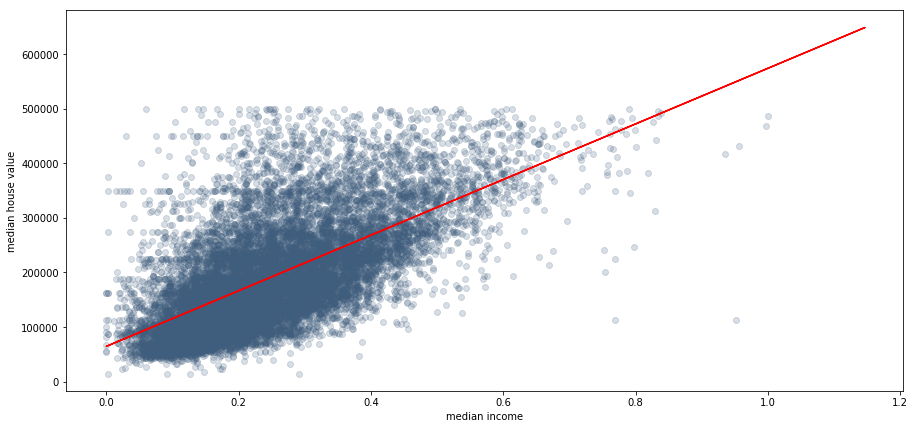

In [63]:
regressor.fit(X_train[:,[7]], y_train)
y_pred_med_inc = regressor.predict(X_test[:,[7]])

rmse_med_inc = np.sqrt(mean_squared_error(y_test , y_pred_med_inc))
cross_val__med_inc = cross_val_score(cv = 10,X = X_train[:,[7]], y = y_train, estimator = regressor, scoring = 'r2')

print('R2 Score: ' + str(cross_val__med_inc.mean()))
print('Variance: ' + str(cross_val__med_inc.std()))

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.2)
plt.plot(X_test[:,7], regressor.predict(X_test[:,7:8]), color ='red')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

## Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

#Predicting the test set results
y_pred_poly = regressor_poly.predict(X_test_poly)

#Performing Cross Validation Scoring
cross_val_poly = cross_val_score(cv = 10,X = X_train_poly, y = y_train, estimator = regressor_poly, scoring = 'r2')
print('R2 Score: ' + str(cross_val_poly.mean()))
print('Variance: ' + str(cross_val_poly.std()))


R2 Score: -11561123652329.566
Variance: 23758085530108.85


* The polynomial regression is suffering from very high variance when using all features to predict

#### Taking only the 'median_income' in consideration (highest correlation)

R2 Score: 0.4194276600974719
Variance: 0.014415397446401907


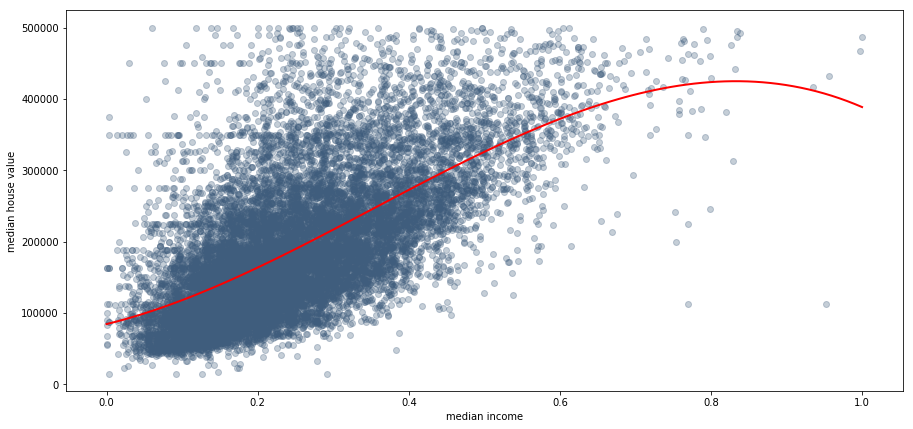

In [33]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train[:,[7]])
X_test_poly = poly.fit_transform(X_test[:,[7]])

regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

#Predicting the test set results
y_pred_poly = regressor_poly.predict(X_test_poly)

#Performing Cross Validation Scoring
cross_val_poly = cross_val_score(cv = 10,X = X_train_poly, y = y_train, estimator = regressor_poly, scoring = 'r2')
print('R2 Score: ' + str(cross_val_poly.mean()))
print('Variance: ' + str(cross_val_poly.std()))

X_new = np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = regressor_poly.predict(X_new_poly)

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.3)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

* Using only the median_income we have a much better result, but the linear regression went better

## Decision Tree

R2 Score: 0.7060781113904006
Variance: 0.01270432695883905


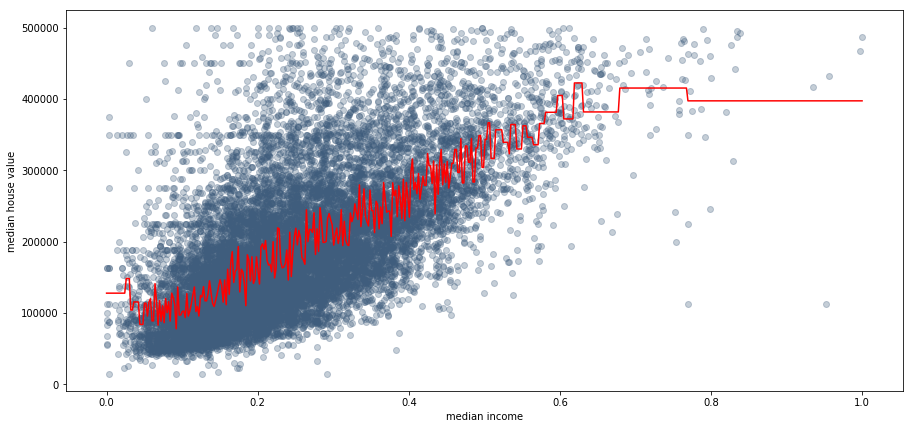

In [84]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=25)
dec_tree_2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=25)
dec_tree.fit(X_train, y_train)
dec_tree_2.fit(X_train[:,[7]], y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

#Performing Cross Validation Scoring
cross_val_dec_tree = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = dec_tree, scoring = 'r2')
print('R2 Score: ' + str(cross_val_dec_tree.mean()))
print('Variance: ' + str(cross_val_dec_tree.std()))

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_1 = dec_tree_2.predict(x1)

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.3)
plt.plot(x1, y_1, color ='red',  )

plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

#Performing grid search to find best parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 90, 180], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train);

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 180}

In [89]:
forest_reg = RandomForestRegressor(max_features = 6, n_estimators=180, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest_reg = forest_reg.predict(X_test)

#Performing Cross Validation Scoring
cross_val_forest_reg = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = forest_reg, scoring = 'r2')
print('R2 Score: ' + str(cross_val_forest_reg.mean()))
print('Variance: ' + str(cross_val_forest_reg.std()))

R2 Score: 0.7920768324032593
Variance: 0.01107013995292256


#### Taking only the 'median_income' in consideration (highest correlation)

R2 Score: 0.7060781113904006
Variance: 0.01270432695883905


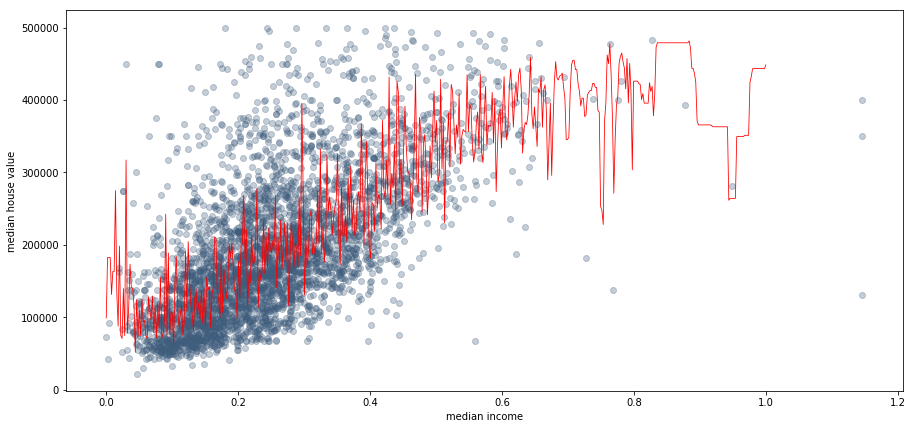

In [38]:
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(X_train[:,[7]], y_train)
y_pred_forest_reg = forest_reg.predict(X_test[:,[7]])

#Performing Cross Validation Scoring
cross_val_forest_reg = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = forest_reg, scoring = 'r2')
print('R2 Score: ' + str(cross_val_dec_tree.mean()))
print('Variance: ' + str(cross_val_dec_tree.std()))

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_1 = forest_reg.predict(x1)

plt.figure(figsize=(15,7))
plt.scatter(X_test[:,7], y_test, color="#3F5D7D", alpha = 0.3)
plt.plot(x1, y_1, color ='red',linewidth=0.8)

plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

It's noticeable that the random forest regressor overfitted when using only one attribute, but this plot is interesting to visualize how the algorithm behaves.

# Comparison

Here are the scores from each algorithm again:

In [189]:
d = {'Linear Reg': [r2_lr, std_lr],
    'Polynomial Reg': [cross_val_poly.mean(), cross_val_poly.std()],
    'Decision Tree Reg': [cross_val_dec_tree.mean(), cross_val_dec_tree.std()],
    'Random Forest Reg': [cross_val_forest_reg.mean(), cross_val_forest_reg.std()]}
scores = pd.DataFrame(d, index = ['R2 Score', 'Std'])
scores

,Linear Reg,Polynomial Reg,Decision Tree Reg,Random Forest Reg
R2 Score,0.592130,0.419428,0.706078,0.792077
Std,0.062593,0.014415,0.012704,0.011070


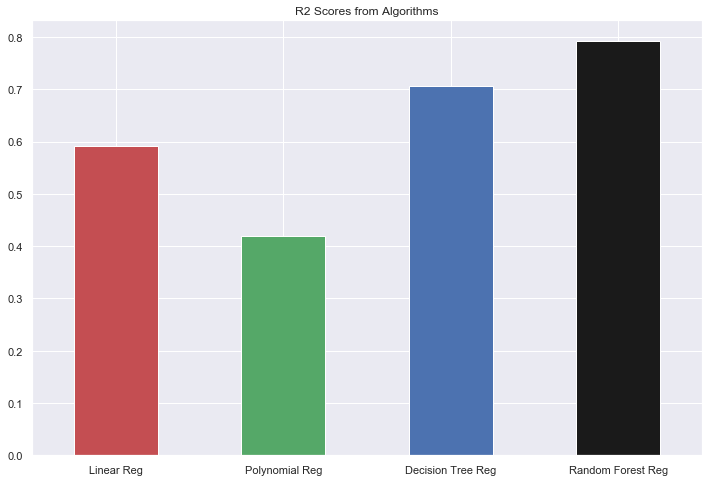

In [192]:
sns.set()
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
scores.loc['R2 Score',:].plot(
    kind = 'bar', 
    color = my_colors,
    figsize=(12,8)
    )
plt.xticks(rotation=0)
plt.title('R2 Scores from Algorithms')
plt.show()

With a R2 Score of 0.792077, the best model found here was the Random Forest Regression using 6 features 180 estimators. 